In [ ]:
!pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import squarify

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Sales Data.xlsx")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2021-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2021-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2021-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2021-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2021-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


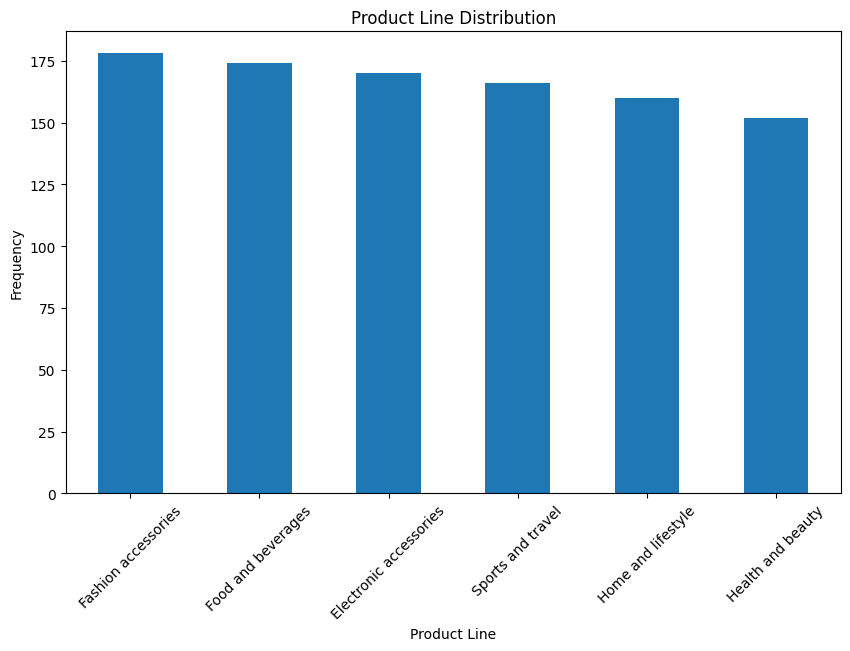

In [ ]:
# Bar chart for comparing product lines
plt.figure(figsize=(10, 6))
df['Product line'].value_counts().plot(kind='bar')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

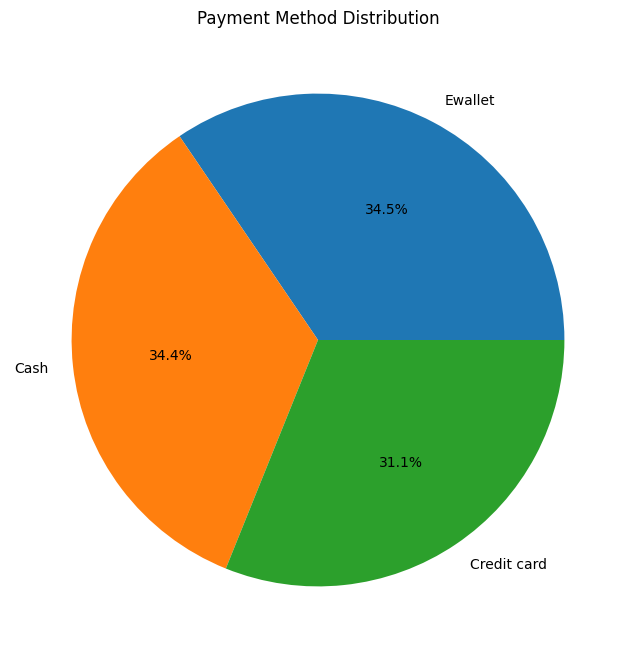

In [ ]:
#Pie chart for payment methods
plt.figure(figsize=(8, 8))
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

<ipython-input-55-23a41f51d886>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M', on='Date').mean()


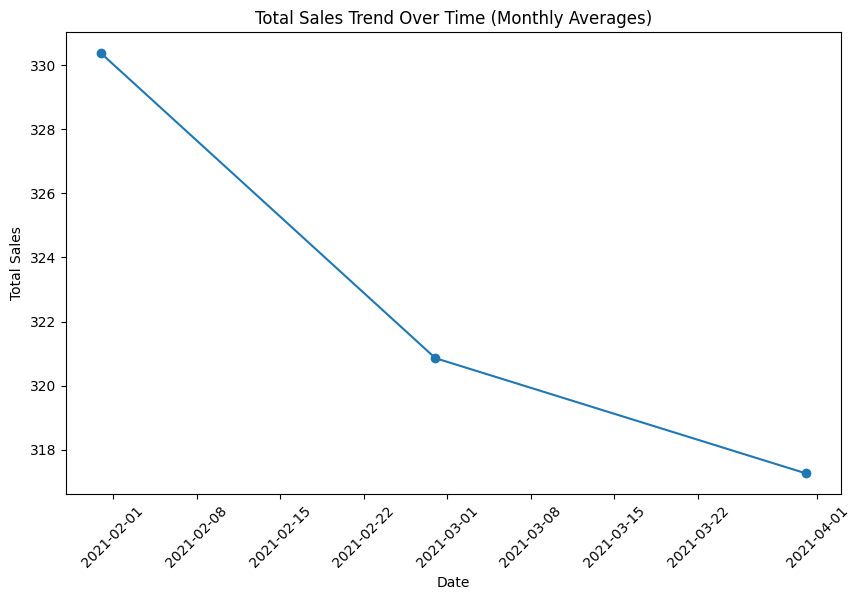

In [ ]:
df_resampled = df.resample('M', on='Date').mean()
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Total'], marker='o')
plt.title('Total Sales Trend Over Time (Monthly Averages)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

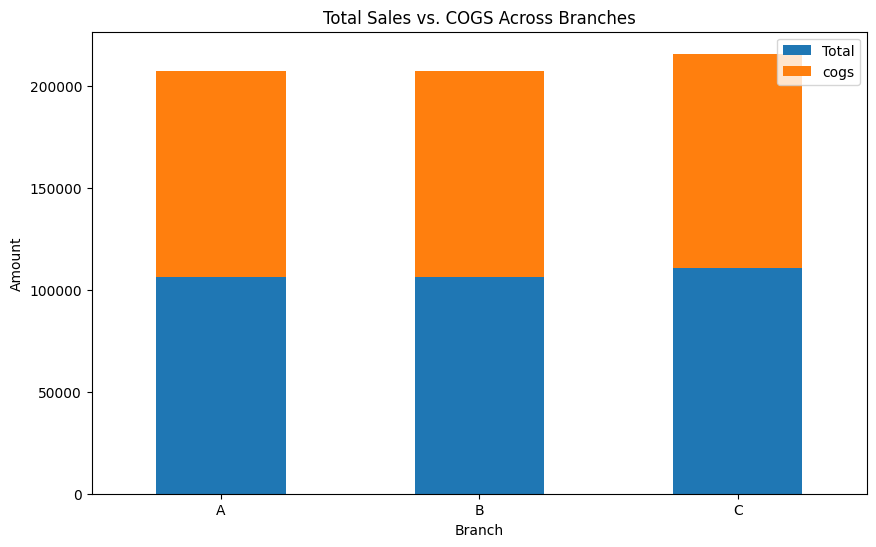

In [ ]:
# Stacked bar chart for comparing Total sales and COGS across branches
branch_sales = df.groupby('Branch')[['Total', 'cogs']].sum()
branch_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales vs. COGS Across Branches')
plt.xlabel('Branch')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

<ipython-input-57-745bf5c01e5f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Unit price'], shade=True)


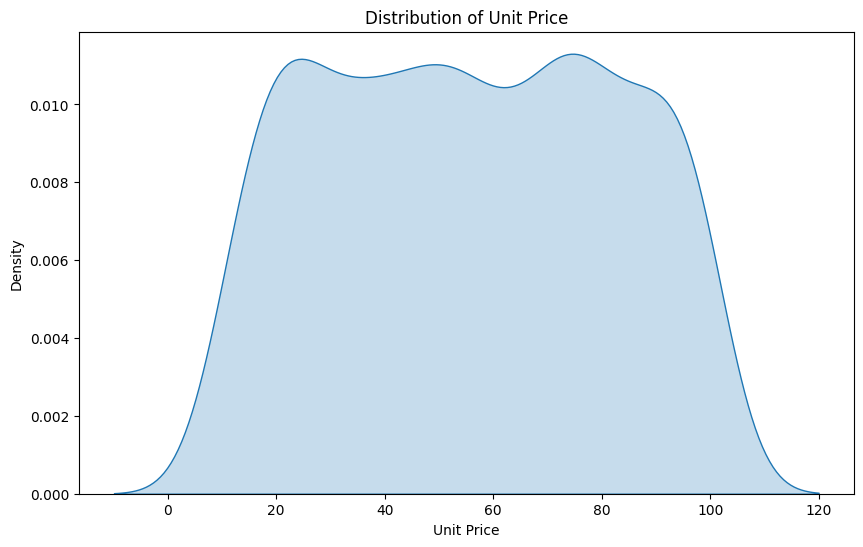

In [ ]:
# KDE plot for visualizing the distribution of Unit Price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Unit price'], shade=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()

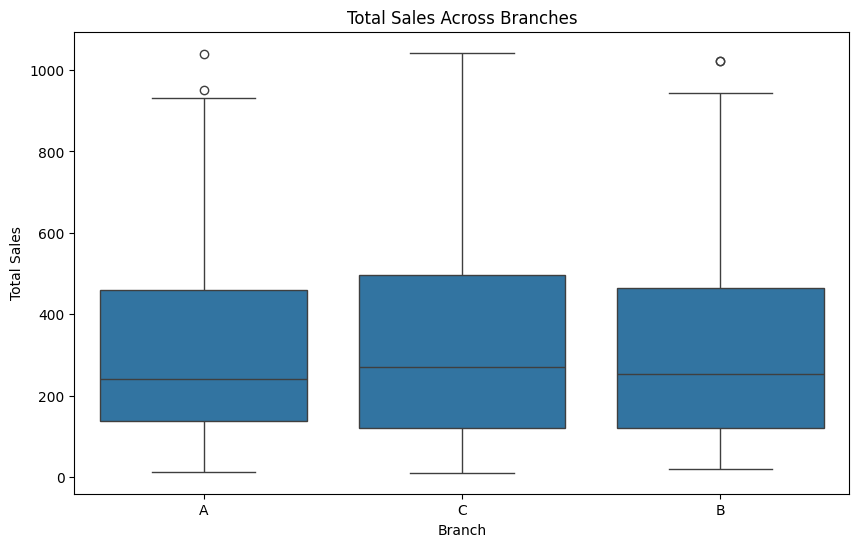

In [ ]:
# Box plot for comparing Total sales across branches
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='Total', data=df)
plt.title('Total Sales Across Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-59-6223dc95ad93>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


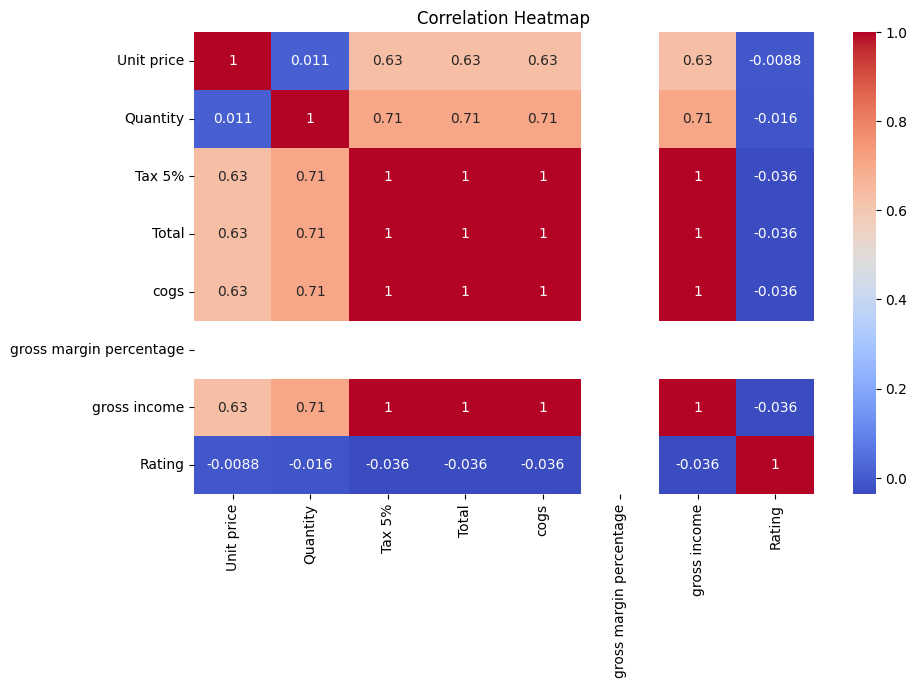

In [ ]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#  Pairplot for exploring relationships between numerical features
# sns.pairplot(df)
# plt.title('Pairplot of Numerical Features')
# plt.show()

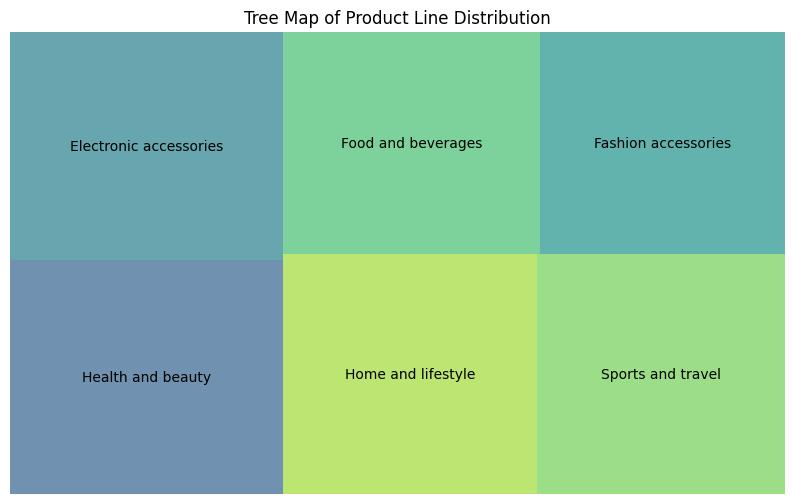

In [ ]:
# Tree map for visualizing the distribution of product lines
plt.figure(figsize=(10, 6))
squarify.plot(sizes=df['Product line'].value_counts(), label=df['Product line'].unique(), alpha=0.7)
plt.axis('off')
plt.title('Tree Map of Product Line Distribution')
plt.show()

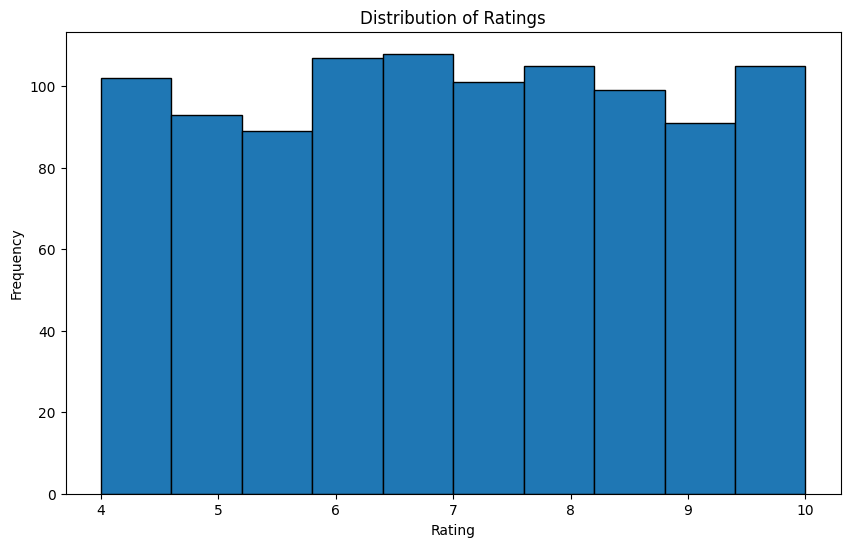

In [ ]:
#  Histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


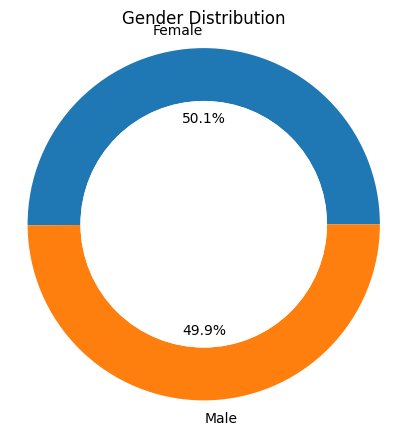

In [ ]:
gender_counts = df['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
wedges, texts, autotexts = ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Gender Distribution')
plt.show()

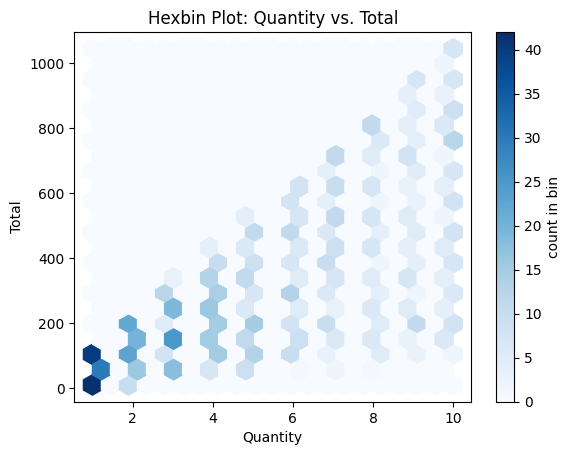

In [ ]:
plt.hexbin(x=df['Quantity'], y=df['Total'], gridsize=20, cmap='Blues')
plt.colorbar(label='count in bin')
plt.title('Hexbin Plot: Quantity vs. Total')
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.show()


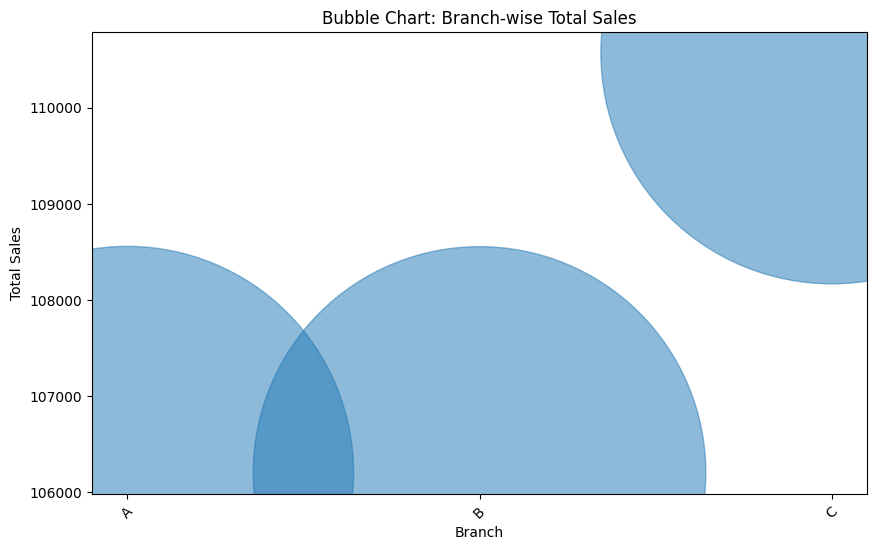

In [ ]:
# Calculate total sales for each branch
branch_total_sales = df.groupby('Branch')['Total'].sum()
plt.figure(figsize=(10,6))
plt.scatter(branch_total_sales.index, branch_total_sales.values, s=branch_total_sales.values, alpha=0.5)
plt.title('Bubble Chart: Branch-wise Total Sales')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

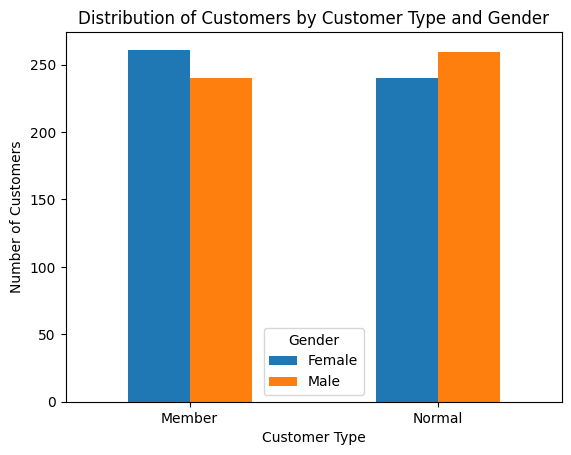

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby(['Customer_type', 'Gender']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Distribution of Customers by Customer Type and Gender')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


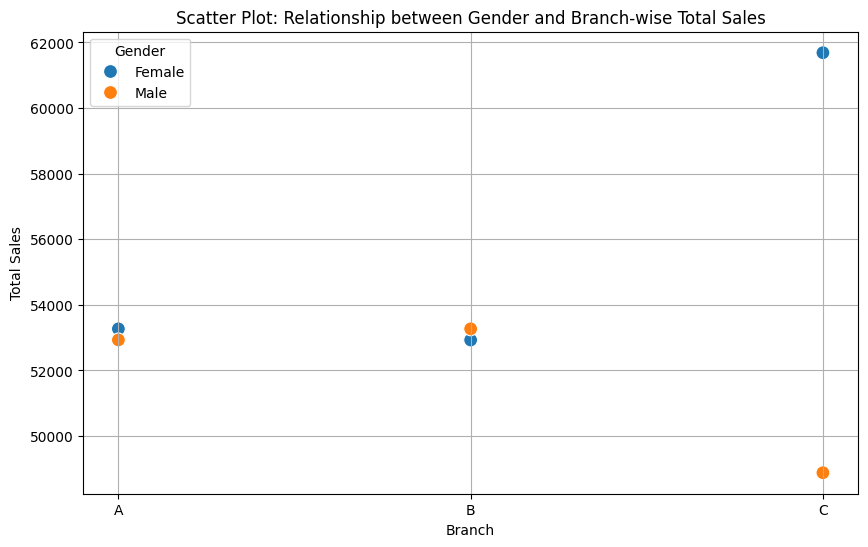

In [ ]:
import seaborn as sns
branch_gender_total = df.groupby(['Branch', 'Gender'])['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=branch_gender_total, x='Branch', y='Total', hue='Gender', s=100)
plt.title('Scatter Plot: Relationship between Gender and Branch-wise Total Sales')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Gender')
plt.show()